**Downloading the Cats vs Dogs Dataset**

The dogs vs cats dataset refers to a dataset used for a Kaggle machine learning competition held in 2013. The dataset is comprised of photos of dogs and cats provided as a subset of photos from a much larger dataset of 3 million manually annotated photos. The dataset was developed as a partnership between Petfinder.com and Microsoft.

In this notebook, we use the compressed version of the cats vs dogs dataset.
 The download link can be found here: https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [ ]:
# downloading compressed cat VS dog Dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip

--2020-09-14 10:01:56--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 173.194.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   201MB/s    in 0.3s    

2020-09-14 10:01:56 (201 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# EXTRACTING ZIP FILE
import os
import zipfile

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
# SETTING PATHS

base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


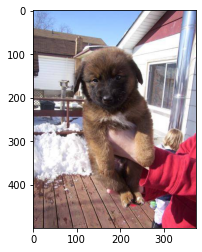

(374, 500)


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

for files in os.listdir(train_dogs_dir):
  img = Image.open(os.path.join(train_dogs_dir,files))
  plt.imshow(img)
  plt.show()
  print(img.size)
  break

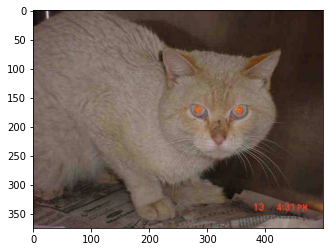

(499, 375)


In [ ]:
for files in os.listdir(train_cats_dir):
  img = Image.open(os.path.join(train_cats_dir,files))
  plt.imshow(img)
  plt.show()
  print(img.size)
  break

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
  )

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='binary'
  )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Image Batch Shape: (64, 150, 150, 3)
Label Batch Shape: (64,)


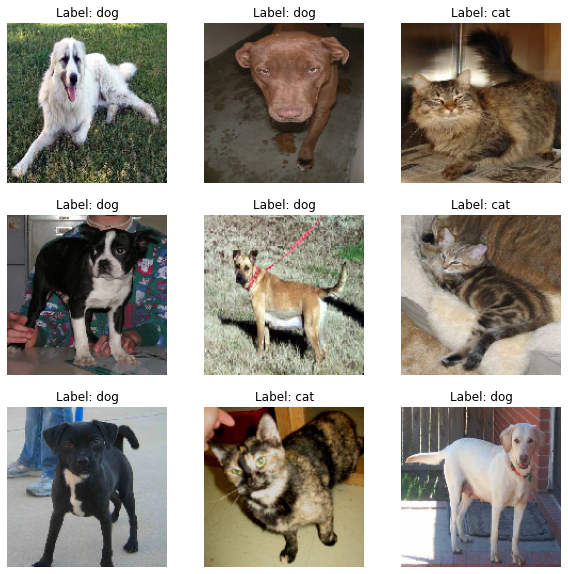

In [ ]:
import matplotlib.pyplot as plt

index_to_class = {0:"cat",1:"dog"}
plt.figure(figsize=(10, 10))
for imagebatch, labelbatch in train_generator:
  print("Image Batch Shape: " + str(imagebatch.shape))
  print("Label Batch Shape: " + str(labelbatch.shape))
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(imagebatch[i])
    plt.title("Label: " + index_to_class[labelbatch[i]])
    plt.axis("off")
  break

In [ ]:
# adding filters and activation ,  Maxpooling
from  tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras import Sequential

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
32/32 [==============================] - 9s 290ms/step - loss: 7.6246 - acc: 0.5000 - val_loss: 7.6246 - val_acc: 0.5000
Epoch 2/30
32/32 [==============================] - 9s 280ms/step - loss: 7.6246 - acc: 0.5000 - val_loss: 7.6246 - val_acc: 0.5000
Epoch 3/30
32/32 [==============================] - 9s 280ms/step - loss: 7.6246 - acc: 0.5000 - val_loss: 7.6246 - val_acc: 0.5000
Epoch 4/30
32/32 [==============================] - 9s 280ms/step - loss: 7.6246 - acc: 0.5000 - val_loss: 7.6246 - val_acc: 0.5000
Epoch 5/30
32/32 [==============================] - 9s 279ms/step - loss: 7.6246 - acc: 0.5000 - val_loss: 7.6246 - val_acc: 0.5000
Epoch 6/30
32/32 [==============================] - 9s 278ms/step - loss: 7.6246 - acc: 0.5000 - val_loss: 7.6246 - val_acc: 0.5000
Epoch 7/30
32/32 [==============================] - 9s 280ms/step - loss: 7.6246 - acc: 0.5000 - val_loss: 7.6246 - val_acc: 0.5000
Epoch 8/30
32/32 [==============================] - 9s 277ms/step - loss: 7.

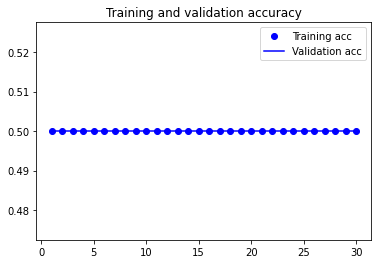

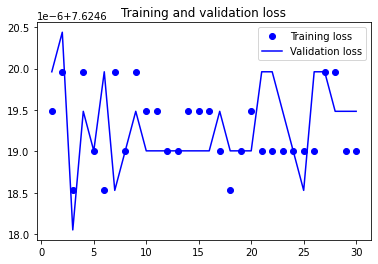

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**1) data augmentetion** To avoid overfitting

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

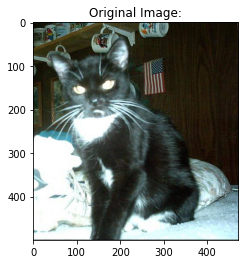

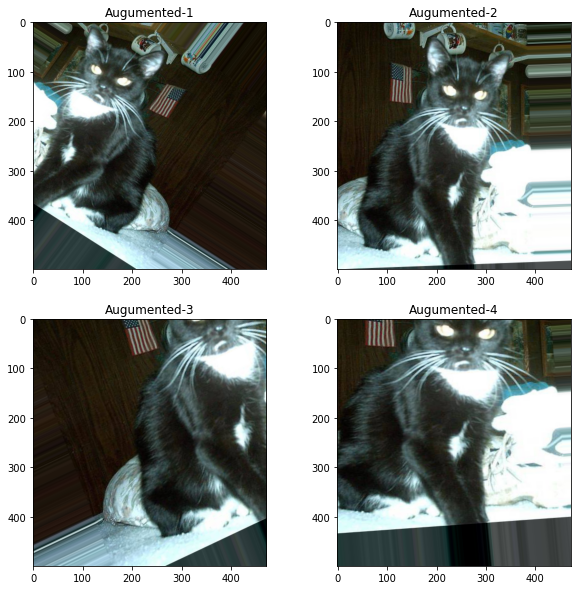

In [ ]:
from PIL import Image
import numpy as np

filename = os.listdir(train_cats_dir)[3]
img = Image.open(os.path.join(train_cats_dir, filename), )

plt.imshow(img)
plt.title("Original Image:")
plt.show()

img = np.array(img)
img = img.reshape((1,) + img.shape)

i = 0
plt.figure(figsize=(10, 10))
for batch in datagen.flow(img, batch_size=1):
  ax = plt.subplot(2, 2, i + 1)
  imgplot = plt.imshow(np.array(batch[0]).astype('uint8'))
  plt.title("Augumented-" + str(i+1))
  i += 1
  if i % 4 == 0:
    break

**2) dropout :** To avoid overfitting

During training, some number of layer outputs are randomly ignored or “dropped out.”

 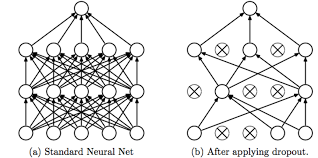

In [ ]:
# adding dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras import Sequential

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))

#Add the dropout layer here

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='softmax'))

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs = 3, validation_data=validation_generator)

Epoch 1/3
16/16 [==============================] - 18s 1s/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/3
 8/16 [==============>...............] - ETA: 6s - loss: 7.6402 - accuracy: 0.4990

In [ ]:
model.summary()

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()